In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from dotenv import load_dotenv

In [2]:
load_dotenv()

DB_USER = os.getenv("MYSQL_USER")
DB_PASSWORD = os.getenv("MYSQL_PASSWORD")
DB_HOST = os.getenv("DB_HOST")
DB_NAME = os.getenv("MYSQL_DATABASE")

DATABASE_URL = f"mysql+mysqlconnector://{DB_USER}:{DB_PASSWORD}@{DB_HOST}/{DB_NAME}"

engine = create_engine(DATABASE_URL)
connection = engine.connect()

In [16]:
query = "SELECT * from avisos;"
df = pd.read_sql(query, connection)
df.head()

In [17]:
print("Columnas: ", df.columns.to_list())
print("# de avisos:", len(df))

Columnas:  ['id', 'aviso_id', 'seccion', 'sociedad', 'rubro', 'id_rubro', 'fecha_publicacion', 'detalle_aviso', 'crawled_at']
# de avisos: 1342069


In [6]:
df.dtypes

id                            int64
aviso_id                     object
seccion                      object
sociedad                     object
rubro                        object
id_rubro                     object
fecha_publicacion            object
detalle_aviso                object
crawled_at           datetime64[ns]
dtype: object

In [7]:
df.nunique()

id                   1342069
aviso_id             1342069
seccion                    1
sociedad              308939
rubro                     19
id_rubro                  19
fecha_publicacion       3544
detalle_aviso         940086
crawled_at             72586
dtype: int64

In [18]:
print((df['id_rubro'] + ' - ' + df['rubro']).value_counts())
df['id_rubro'] = df['id_rubro'].astype(int)

2300 - AVISOS COMERCIALES                                          352521
3300 - SUCESIONES                                                  330253
2100 - CONVOCATORIAS                                               167840
3100 - CITACIONES Y NOTIFICACIONES. CONCURSOS Y QUIEBRAS. OTROS    157610
1210 - CONTRATO SRL                                                 93952
1110 - CONSTITUCION SA                                              60512
1120 - REFORMA SA                                                   60434
1220 - MODIFICACIONES SRL                                           43105
3400 - REMATES JUDICIALES                                           26228
4000 - PARTIDOS POLITICOS                                           14987
1130 - CONSTITUCION SAS                                             14620
2200 - TRANSF. FONDO DE COMERCIO                                    12657
2400 - REMATES COMERCIALES                                           3056
1420 - REFORMA OTRAS SOCIEDADES       

In [58]:
def plot_fecha_publicacion(df):
    yearly_counts = df['year'].value_counts().sort_index()
    plt.figure(figsize=(10,6))
    plt.bar(yearly_counts.index, yearly_counts.values, color='skyblue')
    plt.xlabel('Year')
    plt.ylabel('Number of Publications')
    plt.title('Count of Publications by Year')
    plt.xticks(yearly_counts.index.astype(int)) # Ensure x-axis ticks are integers
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

Series([], Name: count, dtype: int64)


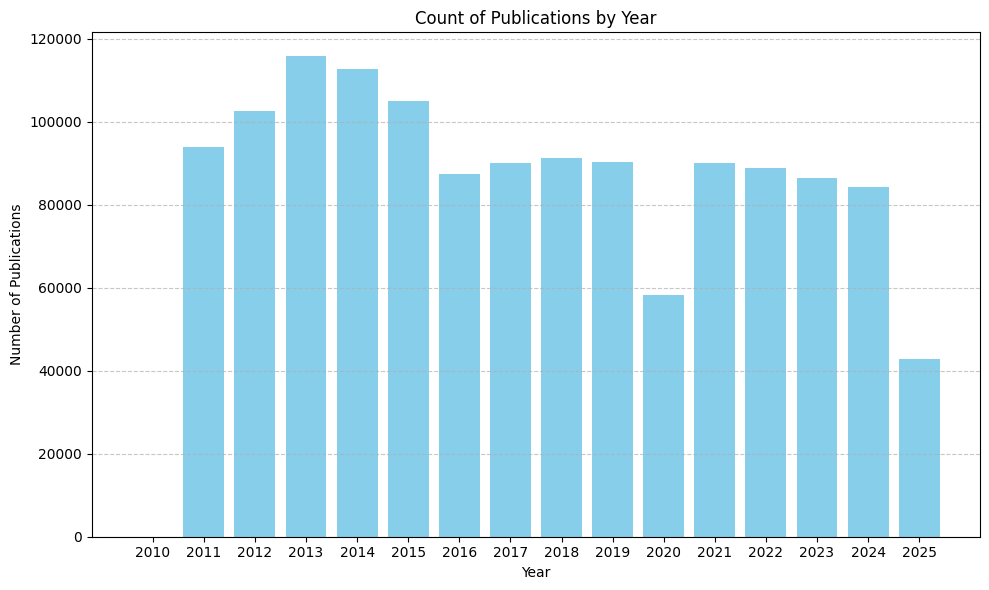

In [59]:
df['fecha_publicacion'] = pd.to_datetime(df['fecha_publicacion'], errors='coerce')
df.dropna(subset=['fecha_publicacion'], inplace=True)

df['year'] = df['fecha_publicacion'].dt.year

plot_fecha_publicacion(df)
print(df[df['year'] < 2000]['fecha_publicacion'].value_counts())

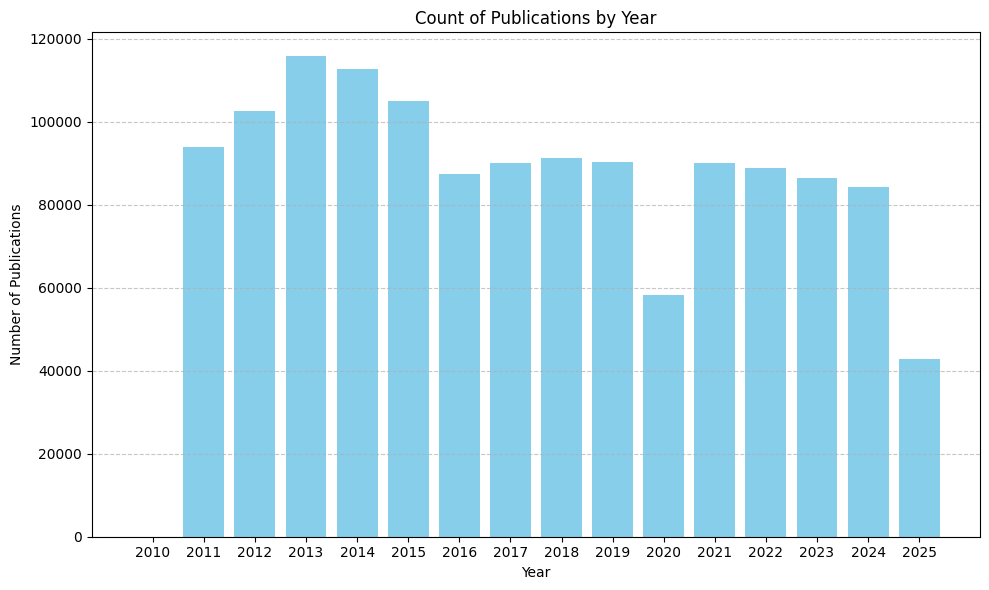

In [60]:
df = df[df['year'] > 2000]
plot_fecha_publicacion(df)

In [56]:
df['sociedad'].value_counts().head(10)

sociedad
                                                                                       195598
JUZGADOS NACIONALES EN LO CIVIL Publicación extractada (Acordada Nº 41/74 C.S.J.N.)    140239
JUZGADOS NACIONALES EN LO CIVIL                                                         12485
TRIBUNAL ORAL EN LO CRIMINAL FEDERAL - CORRIENTES                                        4163
JUZGADO NACIONAL EN LO CRIMINAL Y CORRECCIONAL FEDERAL NRO. 8 - SECRETARÍA NRO. 15       2597
BANCO DE SAN JUAN S.A.                                                                   2078
JUZGADO NACIONAL EN LO COMERCIAL NRO. 2                                                  1136
JUZGADO NACIONAL EN LO COMERCIAL NRO. 24                                                 1125
JUZGADO NACIONAL EN LO COMERCIAL NRO. 5                                                  1095
JUZGADO NACIONAL EN LO COMERCIAL NRO. 17                                                 1074
Name: count, dtype: int64

In [57]:
df_constituciones = df[df['id_rubro'].isin([1110, 1130])]
print("# de Sociedades Constituidas: ", len(df_constituciones))

# de Sociedades Constituidas:  74930


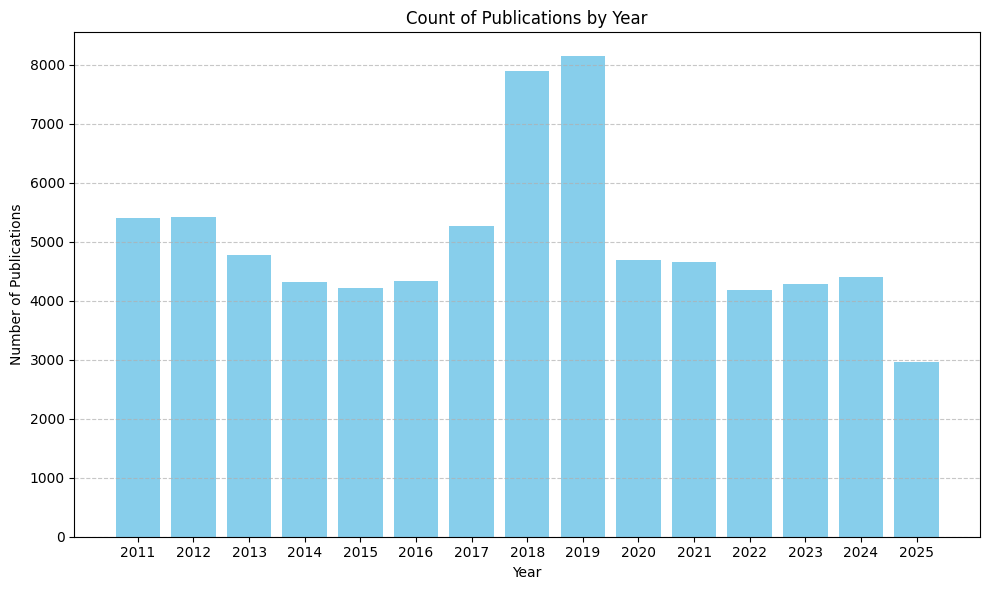

In [61]:
plot_fecha_publicacion(df_constituciones)